In [15]:
# Compare Algorithms
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [16]:
# load dataset
data = pd.read_excel(r'C:\Users\ciafa001\Documents\2. FCE\1. Tesina\0. Mi tesina\2. Codigo\0. Códigos\churn.xlsx')


In [17]:
#Convertin the predictor variable in a binary numeric variable
data['CHURN'].replace(to_replace='Yes', value=1, inplace=True)
data['CHURN'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(data)
#df_dummies.head()

In [18]:
# We will use the data frame where we had created dummy variables
Y = df_dummies['CHURN'].values
X = df_dummies.drop(columns = ['CHURN'])

In [19]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RFC', RandomForestClassifier()))


In [20]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


c:\Users\ciafa001\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ciafa001\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

LR: 0.893500 (0.013677)
RFC: 0.894500 (0.011342)


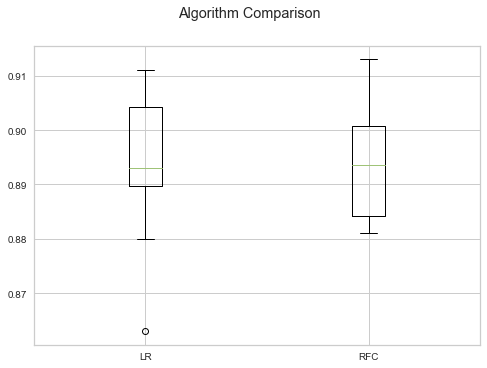

In [21]:
# boxplot algorithm comparison
#Step14 -: Now we will plot an algorithm comparison box plot to compare the accuracy of both algorithms and as we can see the accuracy calculated 
#by Random Forest is more than the accuracy of SVM. It means RF is more accurate than SVM.
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

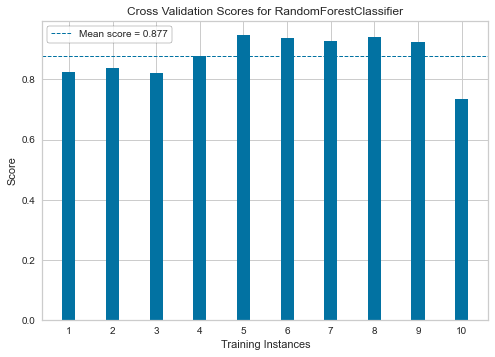

<AxesSubplot:title={'center':'Cross Validation Scores for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [22]:
#Step15 -: Let’s visualize the result of all 10 folds graphically and look at the mean of all the scores.
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

_, ax = plt.subplots()
cv = StratifiedKFold(10)

oz = CVScores(RandomForestClassifier(), ax = ax, cv = cv, scoring = 'accuracy')
oz.fit(X, Y)
oz.poof()